In [1]:
import torch
import torch.nn as nn
import numpy as np
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline

**回归任务**

In [11]:
#加载数据集
features = torch.rand(10000, 500)
labels = (0.0056 * features).sum(dim=1) + 0.028
labels += torch.tensor(np.random.normal(0,0.01,size=labels.size()), dtype=torch.float)

train_features = features[:7000,:]
train_labels = labels[:7000]

test_features = features[7000:,:]
test_lables = labels[7000:]

In [12]:
#定义数据迭代器
train_dataset = torch.utils.data.TensorDataset(train_features,train_labels)
test_dataset = torch.utils.data.TensorDataset(test_features,test_lables)

batch_size = 100
train_iter = torch.utils.data.DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
test_iter = torch.utils.data.DataLoader(test_dataset,batch_size=batch_size,shuffle=False)

In [13]:
# 定义网络
class LinearNet(nn.Module):
    def __init__(self,n_feature):
        super(LinearNet,self).__init__()
        self.linear1 = nn.Linear(n_feature,250)
        self.sigmoid = nn.Sigmoid()
        self.linear2 = nn.Linear(250,1)
    
    def forward(self,x):
        x = self.linear1(x)
        x = self.sigmoid(x)
        y = self.linear2(x)
        return y
    
num_inputs = 500
net = LinearNet(num_inputs)
for param in net.parameters():
    nn.init.normal_(param,mean=0, std= 0.01)

In [14]:
#定义损失函数
loss = nn.MSELoss()

In [15]:
#定义优化算法
optimizer = torch.optim.SGD(net.parameters(),lr=0.001)

In [25]:
#模型训练
def train():
    num_epochs = 20
    train_ls, test_ls = [], []
    for epoch in range(num_epochs):
        ls, count = 0, 0
        for X,y in train_iter:
            l=loss(net(X),y.view(-1,1))
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            ls += l.item()
            count += y.shape[0]
        train_ls.append(ls/count)
        ls, count = 0, 0
        for X,y in test_iter:
            l=loss(net(X),y.view(-1,1))
            ls += l.item()
            count += y.shape[0]
        test_ls.append(ls/count)
        
        print('epoch: %d, train loss: %f, test loss: %f'%(epoch+1,train_ls[-1],test_ls[-1]))
    return train_ls,test_ls

In [17]:
train_ls, test_ls = train()

epoch: 1, train loss: 0.001260, test loss: 0.000014
epoch: 2, train loss: 0.000014, test loss: 0.000014
epoch: 3, train loss: 0.000014, test loss: 0.000014
epoch: 4, train loss: 0.000014, test loss: 0.000014
epoch: 5, train loss: 0.000014, test loss: 0.000014
epoch: 6, train loss: 0.000014, test loss: 0.000014
epoch: 7, train loss: 0.000014, test loss: 0.000014
epoch: 8, train loss: 0.000014, test loss: 0.000014
epoch: 9, train loss: 0.000014, test loss: 0.000014
epoch: 10, train loss: 0.000014, test loss: 0.000014


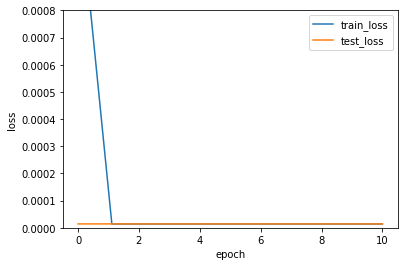

In [18]:
x = np.linspace(0,len(train_ls),len(train_ls))
plt.plot(x,train_ls,label='train_loss',linewidth=1.5)
plt.plot(x,test_ls,label='test_loss',linewidth=1.5)
plt.ylim(0, 0.0008)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

**二分类任务**

In [29]:
#生成数据
x1 = torch.tensor(np.random.normal(2,1,(10000,200)), dtype=torch.float)
x1_labels = torch.ones((10000))
x2 = torch.tensor(np.random.normal(-2,1,(10000,200)), dtype=torch.float)
x2_labels = torch.zeros((10000))
class_2_features = torch.cat((x1,x2),dim=0)
class_2_labels = torch.cat((x1_labels,x2_labels))
index = [i for i in range(len(class_2_labels))]
np.random.shuffle(index)
train_class_2_features = class_2_features[index[:14000],:]
test_class_2_features = class_2_features[index[14000:],:]
train_class_2_labels = class_2_labels[index[:14000]]
test_class_2_labels = class_2_labels[index[14000:]]

In [30]:
#生成数据迭代器
train_dataset = torch.utils.data.TensorDataset(train_class_2_features, train_class_2_labels)
test_dataset = torch.utils.data.TensorDataset(test_class_2_features, test_class_2_labels)
train_iter = torch.utils.data.DataLoader(train_dataset, batch_size=100, shuffle=True)
test_iter = torch.utils.data.DataLoader(test_dataset, batch_size=100, shuffle=False)

In [31]:
# 定义网络
class class_LinearNet(nn.Module):
    def __init__(self,n_feature):
        super(class_LinearNet,self).__init__()
        self.linear1 = nn.Linear(n_feature,100)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(100,1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self,x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.relu(x)
        y = self.sigmoid(x)
        return y
    
num_inputs = 200
net = class_LinearNet(num_inputs)
for param in net.parameters():
    nn.init.normal_(param,mean=0, std= 0.01)

In [32]:
#定义损失函数
loss = nn.BCELoss()

In [33]:
#定义优化方法
optimizer = torch.optim.SGD(net.parameters(),lr = 0.001)

In [34]:
train_ls, test_ls = train()

epoch: 1, train loss: 0.006230, test loss: 0.005523
epoch: 2, train loss: 0.004822, test loss: 0.004286
epoch: 3, train loss: 0.004003, test loss: 0.003837
epoch: 4, train loss: 0.003729, test loss: 0.003682
epoch: 5, train loss: 0.003623, test loss: 0.003613
epoch: 6, train loss: 0.003572, test loss: 0.003576
epoch: 7, train loss: 0.003543, test loss: 0.003554
epoch: 8, train loss: 0.003525, test loss: 0.003540
epoch: 9, train loss: 0.003513, test loss: 0.003530
epoch: 10, train loss: 0.003505, test loss: 0.003522
epoch: 11, train loss: 0.003498, test loss: 0.003517
epoch: 12, train loss: 0.003493, test loss: 0.003512
epoch: 13, train loss: 0.003489, test loss: 0.003509
epoch: 14, train loss: 0.003486, test loss: 0.003506
epoch: 15, train loss: 0.003483, test loss: 0.003503
epoch: 16, train loss: 0.003481, test loss: 0.003501
epoch: 17, train loss: 0.003479, test loss: 0.003500
epoch: 18, train loss: 0.003478, test loss: 0.003498
epoch: 19, train loss: 0.003476, test loss: 0.003497
ep

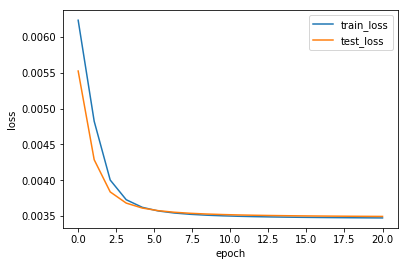

In [35]:
x = np.linspace(0,len(train_ls),len(train_ls))
plt.plot(x,train_ls,label='train_loss',linewidth=1.5)
plt.plot(x,test_ls,label='test_loss',linewidth=1.5)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

**多分类任务**

In [17]:
#生成数据

#下载MNIST手写数字数据集
train_dataset = torchvision.datasets.MNIST(root='./Datasets/MNIST', train=True, transform=transforms.ToTensor(),download=True)
test_dataset = torchvision.datasets.MNIST(root='./Datasets/MNIST', train=False, transform = transforms.ToTensor(),download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

In [19]:
#定义网络
class muti_class_LinearNet(nn.Module):
    def __init__(self,num_inputs, num_outputs, num_hiddens):
        super(muti_class_LinearNet,self).__init__()
        self.linear1 = nn.Linear(num_inputs,num_hiddens)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(num_hiddens,num_outputs)
    
    def forward(self,x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        y = self.relu(x)
        return y

num_inputs, num_outputs, num_hiddens = 784, 10, 100
net = muti_class_LinearNet(num_inputs, num_outputs, num_hiddens)
for param in net.parameters():
    nn.init.normal_(param,mean=0, std= 0.01)

In [20]:
#定义损失函数
loss = nn.CrossEntropyLoss()

In [21]:
#定义优化器
optimizer = torch.optim.SGD(net.parameters(),lr = 0.001)

In [22]:
#模型训练
def train():
    num_epochs = 20
    train_ls, test_ls = [], []
    for epoch in range(num_epochs):
        ls, count = 0, 0
        for X,y in train_loader:
            X = X.reshape(-1,num_inputs)
            l=loss(net(X),y).sum()
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            ls += l.item()
            count += y.shape[0]
        train_ls.append(ls/count)
        ls, count = 0, 0
        for X,y in test_loader:
            X = X.reshape(-1,num_inputs)
            l=loss(net(X),y).sum()
            ls += l.item()
            count += y.shape[0]
        test_ls.append(ls/count)
        
        print('epoch: %d, train loss: %f, test loss: %f'%(epoch+1,train_ls[-1],test_ls[-1]))
    return train_ls,test_ls

In [23]:
train_ls, test_ls = train()

epoch: 1, train loss: 0.071797, test loss: 0.071694
epoch: 2, train loss: 0.071189, test loss: 0.070681
epoch: 3, train loss: 0.069479, test loss: 0.067926
epoch: 4, train loss: 0.065347, test loss: 0.062071
epoch: 5, train loss: 0.058587, test loss: 0.054734
epoch: 6, train loss: 0.052082, test loss: 0.049101
epoch: 7, train loss: 0.047418, test loss: 0.045176
epoch: 8, train loss: 0.044061, test loss: 0.042272
epoch: 9, train loss: 0.041506, test loss: 0.040031
epoch: 10, train loss: 0.039530, test loss: 0.038286
epoch: 11, train loss: 0.037987, test loss: 0.036903
epoch: 12, train loss: 0.036768, test loss: 0.035806
epoch: 13, train loss: 0.035794, test loss: 0.034926
epoch: 14, train loss: 0.035004, test loss: 0.034208
epoch: 15, train loss: 0.034355, test loss: 0.033614
epoch: 16, train loss: 0.033813, test loss: 0.033114
epoch: 17, train loss: 0.033363, test loss: 0.032689
epoch: 18, train loss: 0.032975, test loss: 0.032341
epoch: 19, train loss: 0.032641, test loss: 0.032026
ep

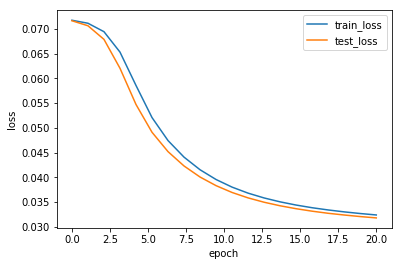

In [25]:
x = np.linspace(0,len(train_ls),len(train_ls))
plt.plot(x,train_ls,label='train_loss',linewidth=1.5)
plt.plot(x,test_ls,label='test_loss',linewidth=1.5)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()